In [1]:
import pandas as pd
from scipy import stats

In [2]:
import utils as ut

In [18]:
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots

In [21]:
pio.renderers.default = "png"

In [5]:
cm100k_obs = ut.load_data('../evaluation/', 'cm100k_observed', 'cm100k_observed_10.csv', ',', 0 )
cm100k_true = ut.load_data('../evaluation/', 'cm100k_true', 'cm100k_true_10.csv', ',', 0 )

In [6]:
cm100k_obs = ut.remove_optimals(cm100k_obs)
cm100k_true = ut.remove_optimals(cm100k_true)

In [7]:
cm100k_obs['algorithm_nick'] = ut.retrieve_nicks(cm100k_obs['algorithm'])
cm100k_true['algorithm_nick'] = ut.retrieve_nicks(cm100k_true['algorithm'])

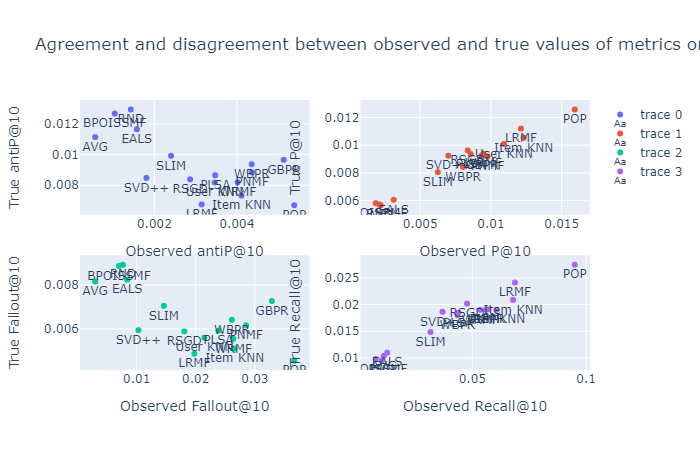

In [22]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Scatter(
        x=cm100k_obs['antiprecision'].values,
        y=cm100k_true['antiprecision'].values,
        mode="markers+text",
        text=cm100k_obs['algorithm_nick'],
        textposition="bottom center"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=cm100k_obs['precision'].values,
        y=cm100k_true['precision'].values,
        mode="markers+text",
        text=cm100k_obs['algorithm_nick'],
        textposition="bottom center"
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=cm100k_obs['fallout'].values,
        y=cm100k_true['fallout'].values,
        mode="markers+text",
        text=cm100k_obs['algorithm_nick'],
        textposition="bottom center"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=cm100k_obs['recall'].values,
        y=cm100k_true['recall'].values,
        mode="markers+text",
        text=cm100k_obs['algorithm_nick'],
        textposition="bottom center"
    ),
    row=2, col=2
)


# Update xaxis properties
fig.update_xaxes(title_text="Observed antiP@10", row=1, col=1)
fig.update_xaxes(title_text="Observed P@10", row=1, col=2)
fig.update_xaxes(title_text="Observed Fallout@10", row=2, col=1)
fig.update_xaxes(title_text="Observed Recall@10", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="True antiP@10", row=1, col=1)
fig.update_yaxes(title_text="True P@10", row=1, col=2)
fig.update_yaxes(title_text="True Fallout@10", row=2, col=1)
fig.update_yaxes(title_text="True Recall@10", row=2, col=2)



fig.update_layout(height=800, width=1000, title_text="Agreement and disagreement between observed and true values of metrics on CM100k")

#fig.show()

In [9]:
tau11, p_value11 = stats.kendalltau(cm100k_obs['antiprecision'].values, cm100k_true['antiprecision'].values)
tau12, p_value12 = stats.kendalltau(cm100k_obs['precision'].values, cm100k_true['precision'].values)
tau21, p_value21 = stats.kendalltau(cm100k_obs['fallout'].values, cm100k_true['fallout'].values)
tau22, p_value22 = stats.kendalltau(cm100k_obs['recall'].values, cm100k_true['recall'].values)

print("tau11: %f , p_value11: %f " % (tau11, p_value11))
print("tau12: %f , p_value12: %f " % ( tau12, p_value12))
print("tau21: %f , p_value21: %f " % (tau21, p_value21))
print("tau22: %f , p_value22: %f " % (tau22, p_value22))

tau11: -0.400000 , p_value11: 0.032626 
tau12: 0.766667 , p_value12: 0.000005 
tau21: -0.450000 , p_value21: 0.015155 
tau22: 0.850000 , p_value22: 0.000000 


## Yahoo! R3

In [10]:
yahoo_obs = ut.load_data('../evaluation/', 'yahoo_observed', 'yahoo_observed_10.csv', ',', 0 )
yahoo_true = ut.load_data('../evaluation/', 'yahoo_true', 'yahoo_true_10.csv', ',', 0 )

In [11]:
yahoo_obs = ut.remove_optimals(yahoo_obs)
yahoo_true = ut.remove_optimals(yahoo_true)

In [12]:
yahoo_obs['algorithm_nick'] = ut.retrieve_nicks(yahoo_obs['algorithm'])
yahoo_true['algorithm_nick'] = ut.retrieve_nicks(yahoo_true['algorithm'])

In [17]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=yahoo_obs['antiprecision'].values,
        y=yahoo_true['antiprecision'].values,
        mode="markers+text",
        text=yahoo_obs['algorithm_nick'],
        textposition="bottom center"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=yahoo_obs['precision'].values,
        y=yahoo_true['precision'].values,
        mode="markers+text",
        text=yahoo_obs['algorithm_nick'],
        textposition="bottom center"
    ),
    row=1, col=2
)


# Update xaxis properties
fig.update_xaxes(title_text="Observed antiP@10", row=1, col=1)
fig.update_xaxes(title_text="Observed P@10", row=1, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="True antiP@10", row=1, col=1)
fig.update_yaxes(title_text="True P@10", row=1, col=2)


fig.update_layout(height=400, width=1000, title_text="Agreement and disagreement between observed and true values of metrics on YAHOO! R3")

fig.show()

In [14]:
tau11, p_value11 = stats.kendalltau(yahoo_obs['antiprecision'].values, yahoo_true['antiprecision'].values)
tau12, p_value12 = stats.kendalltau(yahoo_obs['precision'].values, yahoo_true['precision'].values)

print("tau11: %f , p_value11: %f " % (tau11, p_value11))
print("tau12: %f , p_value12: %f " % ( tau12, p_value12))


tau11: -0.566667 , p_value11: 0.001659 
tau12: 0.916667 , p_value12: 0.000000 
